In [1]:
import tensorflow as tf

from src.data.image_net import create_image_net_data_generator
from src.visualization.plot import plot_loss_and_val_accuracy, plot_loss_and_val_loss

from lib.model.res_net import create_plain_net, create_res_net

In [2]:
train_ds, val_ds, input_shape, num_classes = create_image_net_data_generator(256)

2024-11-11 19:05:49.723120: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-11-11 19:05:49.723144: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2024-11-11 19:05:49.723146: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2024-11-11 19:05:49.723174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-11 19:05:49.723195: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Plain NET

In [3]:
model = create_plain_net(num_classes, input_shape)

model.summary()

opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-4)

model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"],
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 115, 115, 64)      9472      
                                                                 
 batch_normalization (Batch  (None, 115, 115, 64)      256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 115, 115, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 58, 58, 64)        0     

In [4]:
train_feedback = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
)

print("Test loss: " + str(train_feedback.history["val_loss"][-1]))
print("Test accuracy: " + str(train_feedback.history["val_accuracy"][-1]))

Epoch 1/20


2024-11-11 19:05:51.324180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 47s 1s/step - loss: 2.6128 - accuracy: 0.1164 - val_loss: 2.3144 - val_accuracy: 0.0986
Epoch 2/20
37/37 [==============================] - 45s 1s/step - loss: 2.3040 - accuracy: 0.1361 - val_loss: 2.3506 - val_accuracy: 0.0986
Epoch 3/20
37/37 [==============================] - 47s 1s/step - loss: 2.2469 - accuracy: 0.1621 - val_loss: 2.5011 - val_accuracy: 0.0986
Epoch 4/20
37/37 [==============================] - 47s 1s/step - loss: 2.1481 - accuracy: 0.2022 - val_loss: 3.0511 - val_accuracy: 0.0994
Epoch 5/20
37/37 [==============================] - 50s 1s/step - loss: 1.9761 - accuracy: 0.2873 - val_loss: 2.8074 - val_accuracy: 0.1017
Epoch 6/20
37/37 [==============================] - 49s 1s/step - loss: 1.8226 - accuracy: 0.3474 - val_loss: 3.0698 - val_accuracy: 0.1192
Epoch 7/20
37/37 [==============================] - 49s 1s/step - loss: 1.6996 - accuracy: 0.4093 - val_loss: 3.2908 - val_accuracy: 0.1251
Epoch 8/20
37/37 [=============

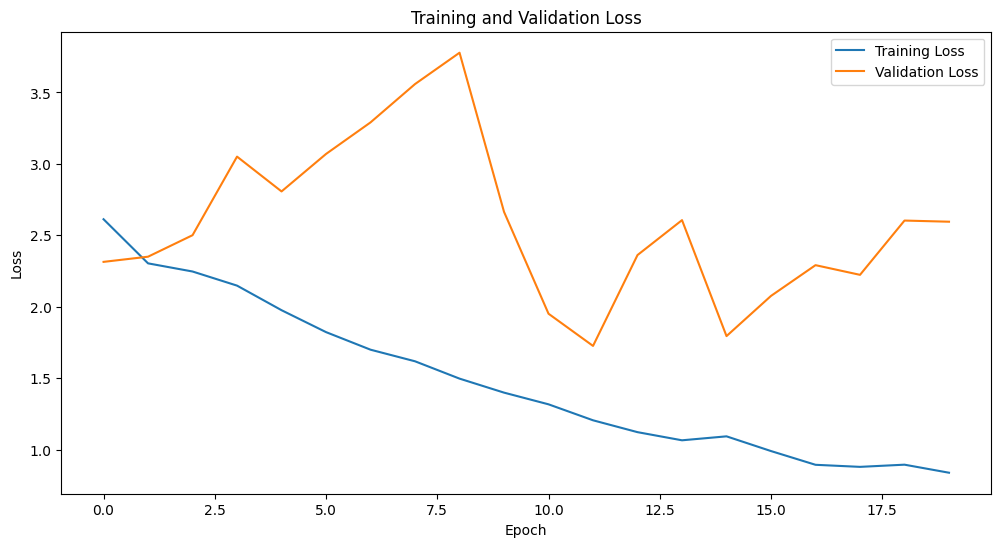

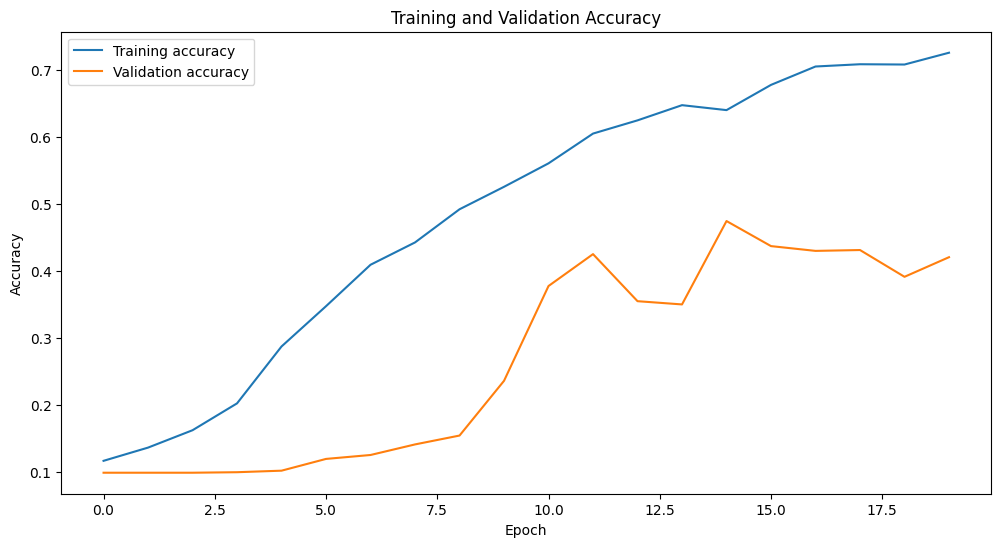

In [5]:
plot_loss_and_val_loss(train_feedback)
plot_loss_and_val_accuracy(train_feedback)

# ResNET

In [6]:
model = create_res_net(num_classes, input_shape)

model.summary()

opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-4)

model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"],
)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_1 (ZeroPadd  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv2d_33 (Conv2D)          (None, 115, 115, 64)         9472      ['zero_padding2d_1[0][0]']    
                                                                                                  
 batch_normalization_33 (Ba  (None, 115, 115, 64)         256       ['conv2d_33[0][0]']     

In [7]:
train_feedback = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
)

print("Test loss: " + str(train_feedback.history["val_loss"][-1]))
print("Test accuracy: " + str(train_feedback.history["val_accuracy"][-1]))

Epoch 1/20
37/37 [==============================] - 53s 1s/step - loss: 6.2238 - accuracy: 0.2080 - val_loss: 4.3857 - val_accuracy: 0.1608
Epoch 2/20
37/37 [==============================] - 50s 1s/step - loss: 2.1247 - accuracy: 0.3509 - val_loss: 2.4981 - val_accuracy: 0.1628
Epoch 3/20
37/37 [==============================] - 49s 1s/step - loss: 1.7390 - accuracy: 0.4589 - val_loss: 2.5735 - val_accuracy: 0.1845
Epoch 4/20
37/37 [==============================] - 49s 1s/step - loss: 1.4716 - accuracy: 0.5401 - val_loss: 2.9544 - val_accuracy: 0.1814
Epoch 5/20
37/37 [==============================] - 49s 1s/step - loss: 1.2523 - accuracy: 0.6057 - val_loss: 3.2315 - val_accuracy: 0.1964
Epoch 6/20
37/37 [==============================] - 49s 1s/step - loss: 1.0065 - accuracy: 0.6798 - val_loss: 3.7729 - val_accuracy: 0.2023
Epoch 7/20
37/37 [==============================] - 49s 1s/step - loss: 0.8431 - accuracy: 0.7303 - val_loss: 3.1400 - val_accuracy: 0.2943
Epoch 8/20
37/37 [==

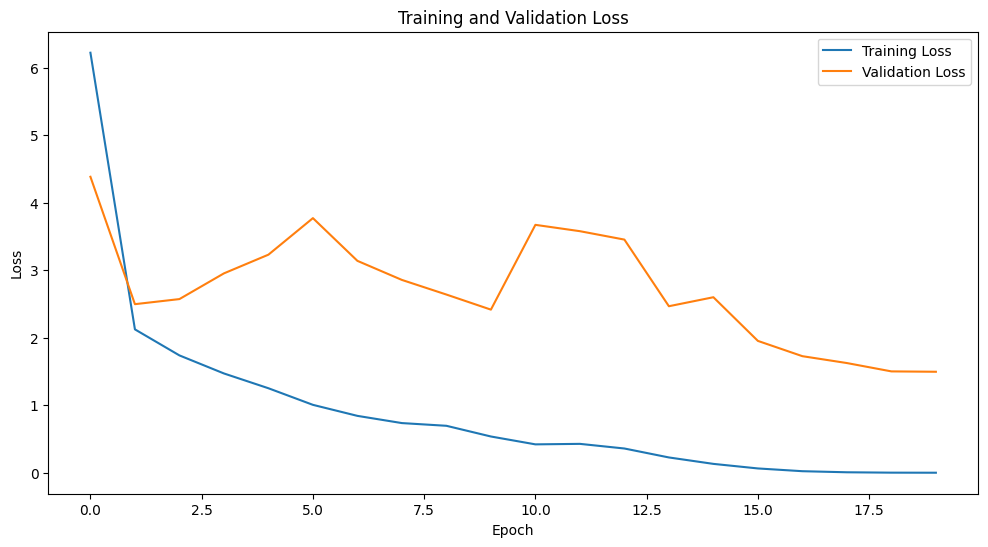

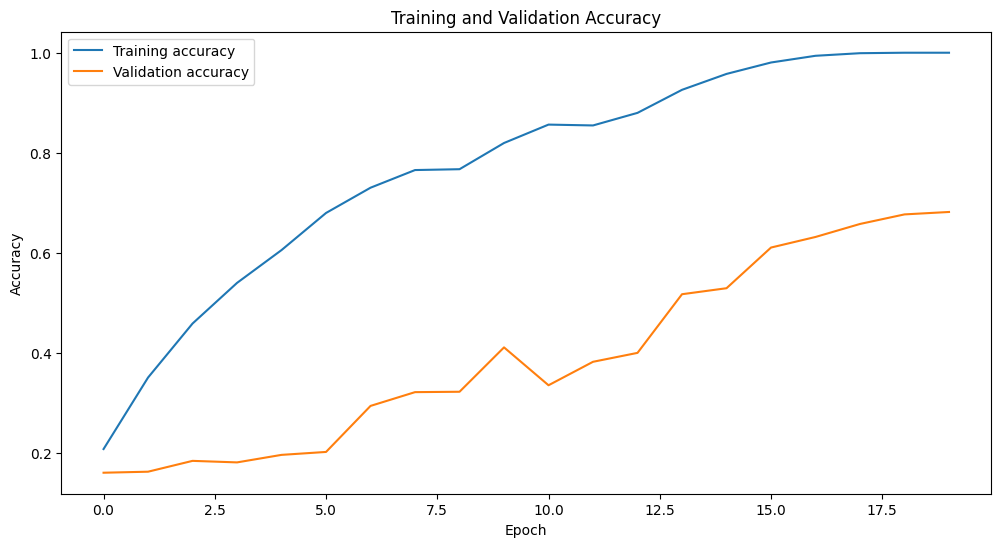

In [8]:
plot_loss_and_val_loss(train_feedback)
plot_loss_and_val_accuracy(train_feedback)